In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.colors as mcolors
import matplotlib.cm
from matplotlib import rc
from collections import defaultdict
import sys
import math

rc('font', family='serif', size='10')
rc('axes', labelsize='medium')
rc('legend', numpoints=1)
rc('lines', linewidth=1)
rc('text', usetex=True)


In [38]:
s = """num:1000, p:1.0, meanerror:0.1537685004564432
defaultdict(<class 'float'>, {'': 0.46101677, '1': 0.7592254, '10': 0.47268346, '101': 0.44552952, '010': 0.46879062, '011': 0.677474, '110': 0.48438007, '100': 0.4378235, '001': 0.441673, '000': 0.43398148, '111': 0.80746067, '0': 0.28298813, '01': 0.4378235})
num:5000, p:1.0, meanerror:0.13749727606773376
defaultdict(<class 'float'>, {'': 0.50390613, '1': 0.7490872, '10': 0.5078119, '101': 0.50390613, '010': 0.5078119, '100': 0.5, '000': 0.49218816, '001': 0.4941409, '011': 0.72564864, '110': 0.51757085, '111': 0.7892337, '0': 0.26971012, '01': 0.49414086})
num:10000, p:1.0, meanerror:0.1257685858469743
defaultdict(<class 'float'>, {'': 0.50781184, '1': 0.76348376, '10': 0.4941409, '101': 0.5019531, '010': 0.49804688, '011': 0.53509843, '110': 0.49609384, '100': 0.49218816, '001': 0.49609387, '000': 0.48438013, '111': 0.80532616, '0': 0.26740816, '01': 0.49609387})
num:50000, p:1.0, meanerror:0.12369601313884442
defaultdict(<class 'float'>, {'': 0.4882834, '1': 0.746139, '10': 0.49218813, '101': 0.49023563, '010': 0.49218816, '011': 0.5428633, '110': 0.49414086, '100': 0.48633152, '001': 0.49023563, '000': 0.4843801, '111': 0.7620701, '0': 0.25238404, '01': 0.4882834})
num:100000, p:1.0, meanerror:0.130267199415427
defaultdict(<class 'float'>, {'': 0.5097644, '1': 0.7752647, '10': 0.5292634, '101': 0.5273165, '010': 0.5253688, '100': 0.51952136, '000': 0.5214712, '001': 0.5389832, '011': 0.5794004, '110': 0.5273165, '111': 0.7866228, '0': 0.23300754, '01': 0.52342033})
num:500000, p:1.0, meanerror:0.12172239560347337
defaultdict(<class 'float'>, {'': 0.49609387, '1': 0.75635755, '10': 0.49804688, '101': 0.49804688, '010': 0.49804688, '011': 0.53120935, '110': 0.5019531, '100': 0.4941409, '001': 0.4960938, '000': 0.48828343, '111': 0.7833262, '0': 0.24436301, '01': 0.4960938})
"""

In [44]:
elements = [s.split('\n')[i:i+2] for i in range(0, len(s.split('\n'))-1, 2)]
results = {}
emp_ms = []
for el in elements:
    vals = el[0].split(', ')
    num = int(vals[0].split(':')[1])
    p = float(vals[1].split(':')[1])
    err = float(vals[2].split(':')[1])
    if p not in results:
        results[p] = defaultdict(float)
    results[p][num] = err
    emp_m = eval('{' + el[1].split(", {")[1][:-1])
    emp_ms.append(emp_m)
print(results)

{1.0: defaultdict(<class 'float'>, {1000: 0.1537685004564432, 5000: 0.13749727606773376, 10000: 0.1257685858469743, 50000: 0.12369601313884442, 100000: 0.130267199415427, 500000: 0.12172239560347337})}


[1000, 5000, 10000, 50000, 100000, 500000]


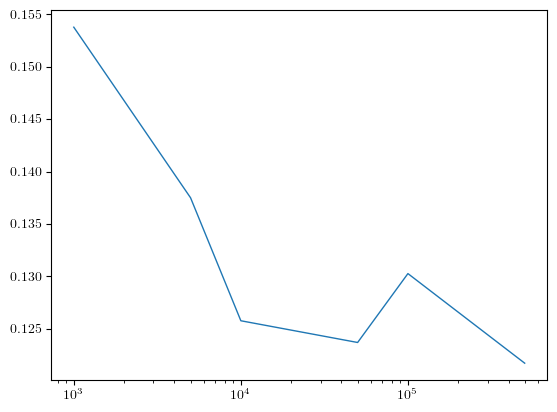

In [42]:
ps = [1.0]
for p in ps:
    keys = sorted(results[p].keys())
    print(keys)
    plt.plot(keys, [results[p][k] for k in keys])
    plt.xscale('log')
    plt.show()

In [53]:
markov = {}
size = 3
rng = np.random.default_rng(42)
for s in range(1, size+1):
    # print(s)
    for i in range(2**s):
        curr_seed = format(i, f'0{s}b')
        # print(i, curr_seed)
        bias = rng.choice([0.25, 0.5, 0.75])
        markov[curr_seed] = bias
markov[''] = 0.5
print(markov)

{'0': 0.25, '1': 0.75, '00': 0.5, '01': 0.5, '10': 0.5, '11': 0.75, '000': 0.25, '001': 0.75, '010': 0.25, '011': 0.25, '100': 0.5, '101': 0.75, '110': 0.75, '111': 0.75, '': 0.5}


In [63]:
l = {'': 0.50732374, '1': 0.75527614, '10': 0.50585914, '101': 0.5058591, '010': 0.5053709, '011': 0.755637, '110': 0.50488263, '100': 0.5068355, '001': 0.50634736, '000': 0.5073237, '111': 0.75527614, '0': 0.24490438, '01': 0.5063473}
diffs = {}
for i in range(len(emp_ms[-1:])):
    for k in markov:
        if k in l:
            diffs[k] = abs(markov[k] - l[k])
            print(f"{k}: {markov[k]}, {l[k]}")
        else:
            print(f"NO {k}")
    print(diffs)
    # print(markov) 
    # print(emp_ms[i])

0: 0.25, 0.29396155
1: 0.75, 0.7567173
NO 00
01: 0.5, 0.47365725
10: 0.5, 0.49804688
NO 11
000: 0.25, 0.46295857
001: 0.75, 0.47560534
010: 0.25, 0.49902347
011: 0.25, 0.75527614
100: 0.5, 0.4707366
101: 0.75, 0.47365725
110: 0.75, 0.5
111: 0.75, 0.7559975
: 0.5, 0.51952136
{'0': 0.043961550000000016, '1': 0.006717300000000037, '01': 0.026342750000000026, '10': 0.0019531199999999749, '000': 0.21295857, '001': 0.27439466, '010': 0.24902347000000002, '011': 0.50527614, '100': 0.029263399999999995, '101': 0.27634275, '110': 0.25, '111': 0.005997499999999989, '': 0.019521360000000043}


In [64]:
print(markov)

{'0': 0.25, '1': 0.75, '00': 0.5, '01': 0.5, '10': 0.5, '11': 0.75, '000': 0.25, '001': 0.75, '010': 0.25, '011': 0.25, '100': 0.5, '101': 0.75, '110': 0.75, '111': 0.75, '': 0.5}
